# An Investigation to Assess the Effectiveness of ESOL Teaching in Secondary School in Pakistan

### Import Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import ttest_ind
print("All libraries successfully imported")

All libraries successfully imported


### Reading the Dataset

In [50]:
# Load the dataset
file_path = "C:\\Users\\n\\Downloads\\ESOL_Teaching_Survey_Data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,gender,age,role,school_affiliation,experience,teaching_effectiveness,teaching_methods,primary_language_use,tech_impact,biggest_challenge,...,performance_other_subjects,preparation_higher_ed,student_participation,teacher_preparedness,professional_development,admin_support,curriculum_alignment,resources_used,resource_accessibility,teaching_improvements
0,Female,30-39 years,ESOL Teacher,SOAR STEM school,1-3 years,3,Communicative Language Teaching (CLT);Technolo...,Often,4,Language Barriers,...,Good,Neutral,51-75%,4,Workshops/Seminars;Online Courses; Peer Collab...,Satisfied,4,Textbooks;Online Resources;,Accessible,"In my opinion, institutions' support and avail..."
1,Male,20-29 years,Subject Teacher (non-ESOL),SOAR STEM school,Less than 1 year,4,Direct Instruction;Communicative Language Teac...,Often,4,Large Class Sizes,...,Good,To Some Extent,51-75%,3,Workshops/Seminars;,Satisfied,3,Textbooks;Audio-Visual Materials;,Accessible,More interactive workshops for teachers. Activ...
2,Male,30-39 years,ESOL Teacher,Lahore grammar school,1-3 years,4,Direct Instruction;Collaborative Learning;Task...,Always,4,Language Barriers,...,Good,To Some Extent,51-75%,4,Workshops/Seminars;Online Courses; Peer Collab...,Very satisfied,4,Textbooks;Online Resources;,Neutral,Frequent Incorporation of audio visual techniq...
3,Female,20-29 years,ESOL Teacher,Lahore grammar school,1-3 years,4,Collaborative Learning;Task-based Learning;Com...,Often,4,Large Class Sizes,...,Good,To a Great Extent,51-75%,4,Workshops/Seminars; Peer Collaboration; Mentor...,Satisfied,3,Textbooks;Audio-Visual Materials;Language Labs;,Accessible,In order to enhance the effectiveness of ESOL ...
4,Female,20-29 years,School Administrator,SOAR STEM school,1-3 years,3,Direct Instruction;,Often,4,Low Student Engagement,...,Good,Neutral,26-50%,4,Workshops/Seminars; Peer Collaboration;,Neutral,4,Textbooks;,Accessible,By giving opportunities to students to explore...


In [51]:
# Display the last few rows
data.tail()


,gender,age,role,school_affiliation,experience,teaching_effectiveness,teaching_methods,primary_language_use,tech_impact,biggest_challenge,...,performance_other_subjects,preparation_higher_ed,student_participation,teacher_preparedness,professional_development,admin_support,curriculum_alignment,resources_used,resource_accessibility,teaching_improvements
23,Female,Under 20 years,Subject Teacher (non-ESOL),Lahore grammar school,1-3 years,5,Collaborative Learning;,Always,5,Low Student Engagement,...,Excellent,To a Great Extent,51-75%,5,Workshops/Seminars;,Very satisfied,5,Online Resources;,Very Accessible,To improve ESOL teaching in secondary schools ...
24,Female,30-39 years,Subject Teacher (non-ESOL),Lahore grammar school,1-3 years,4,Direct Instruction;,Always,5,Language Barriers,...,Good,To a Great Extent,76-100%,5,Workshops/Seminars;,Very satisfied,2,Textbooks;,Accessible,Always make yourself in improvement
25,Female,40-49 years,Subject Teacher (non-ESOL),Lahore grammar school,1-3 years,5,Communicative Language Teaching (CLT);,Always,5,Language Barriers,...,Good,To a Great Extent,76-100%,4,Workshops/Seminars;Online Courses; Peer Collab...,Very satisfied,5,Language Labs;Audio-Visual Materials;Online Re...,Very Accessible,In pakistan teachers need better training in m...
26,Female,20-29 years,Subject Teacher (non-ESOL),Lahore grammar school,7-10 years,5,Collaborative Learning;,Always,5,Insufficient Training,...,Good,Neutral,51-75%,5,Workshops/Seminars;,Satisfied,5,Online Resources;,Accessible,Training sessions Nd seminars
27,Female,20-29 years,Subject Teacher (non-ESOL),Lahore grammar school,1-3 years,3,Collaborative Learning;,Always,2,Language Barriers,...,Excellent,To Some Extent,26-50%,3,Online Courses;,Satisfied,4,Online Resources;,Accessible,Spoken\n


### Data Cleaning and Transformation

In [52]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (for example, we can fill missing 'experience' with the mode)
data['experience'].fillna(data['experience'].mode()[0], inplace=True)

# Drop rows with too many missing values
data.dropna(thresh=5, inplace=True)  # Drops rows where more than 5 columns are missing


gender                        0
age                           0
role                          0
school_affiliation            0
experience                    0
teaching_effectiveness        0
teaching_methods              0
primary_language_use          0
tech_impact                   0
biggest_challenge             0
proficiency_improvement       0
performance_other_subjects    0
preparation_higher_ed         0
student_participation         0
teacher_preparedness          0
professional_development      0
admin_support                 0
curriculum_alignment          0
resources_used                0
resource_accessibility        0
teaching_improvements         0
dtype: int64


### Encoding categorical variables

In [53]:
#Some of the columns have categorical data, like gender, school_affiliation, etc. We'll use LabelEncoder for this.
# Label encoding categorical variables
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['gender', 'role', 'school_affiliation', 'primary_language_use', 'biggest_challenge', 'proficiency_improvement']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())


   gender          age  role  school_affiliation         experience  \
0       1  30-39 years     1                   1          1-3 years   
1       0  20-29 years     5                   1   Less than 1 year   
2       0  30-39 years     1                   0          1-3 years   
3       1  20-29 years     1                   0          1-3 years   
4       1  20-29 years     4                   1          1-3 years   

   teaching_effectiveness                                   teaching_methods  \
0                       3  Communicative Language Teaching (CLT);Technolo...   
1                       4  Direct Instruction;Communicative Language Teac...   
2                       4  Direct Instruction;Collaborative Learning;Task...   
3                       4  Collaborative Learning;Task-based Learning;Com...   
4                       3                                Direct Instruction;   

   primary_language_use  tech_impact  biggest_challenge  ...  \
0                     1     

### Handling multi-select fields

In [54]:
#For columns like teaching_methods, which have multiple values separated by semicolons, we can split them into individual columns.

# Split multi-select columns
teaching_methods = data['teaching_methods'].str.get_dummies(sep=';')

# Add the columns to the original dataset
data = pd.concat([data, teaching_methods], axis=1)

# Drop the original 'teaching_methods' column
data.drop('teaching_methods', axis=1, inplace=True)


## Descriptive Statistics

In [55]:
# Descriptive statistics for numerical columns
print(data.describe())

# Descriptive statistics for categorical columns
print(data[categorical_columns].describe(include='all'))


          gender       role  school_affiliation  teaching_effectiveness  \
count  28.000000  28.000000           28.000000               28.000000   
mean    0.928571   3.571429            0.214286                4.000000   
std     0.262265   1.874361            0.417855                0.720082   
min     0.000000   0.000000            0.000000                3.000000   
25%     1.000000   1.000000            0.000000                3.750000   
50%     1.000000   5.000000            0.000000                4.000000   
75%     1.000000   5.000000            0.000000                4.250000   
max     1.000000   5.000000            1.000000                5.000000   

       primary_language_use  tech_impact  biggest_challenge  \
count              28.00000    28.000000          28.000000   
mean                0.50000     4.214286           2.107143   
std                 0.57735     0.738223           1.227442   
min                 0.00000     2.000000           0.000000   
25%      

## Data Visualization

1) Gender Distribution

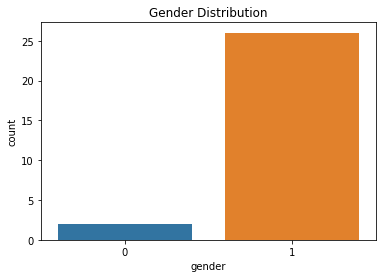

In [56]:
# Gender distribution
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()


2) Teaching Effectiveness by Role

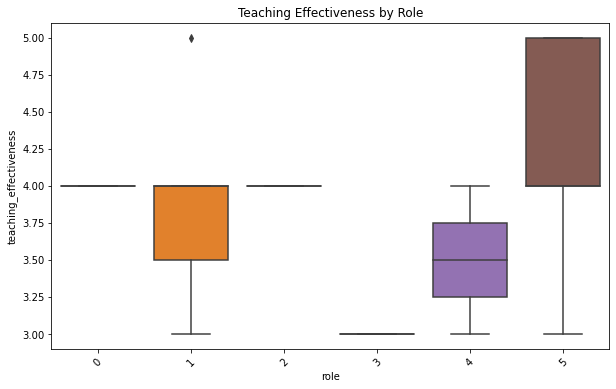

In [57]:
# Teaching effectiveness by role
plt.figure(figsize=(10, 6))
sns.boxplot(x='role', y='teaching_effectiveness', data=data)
plt.title('Teaching Effectiveness by Role')
plt.xticks(rotation=45)
plt.show()


3). Pie chart for proficiency improvement

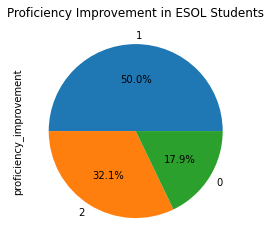

In [58]:
# Pie chart for proficiency improvement
data['proficiency_improvement'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proficiency Improvement in ESOL Students')
plt.show()


4). Pie chart for gender distribution

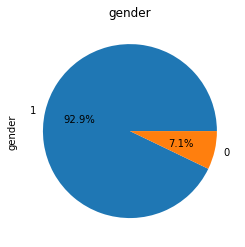

In [75]:
# Pie chart for proficiency improvement
data['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

4) Bar chart for distribution of roles

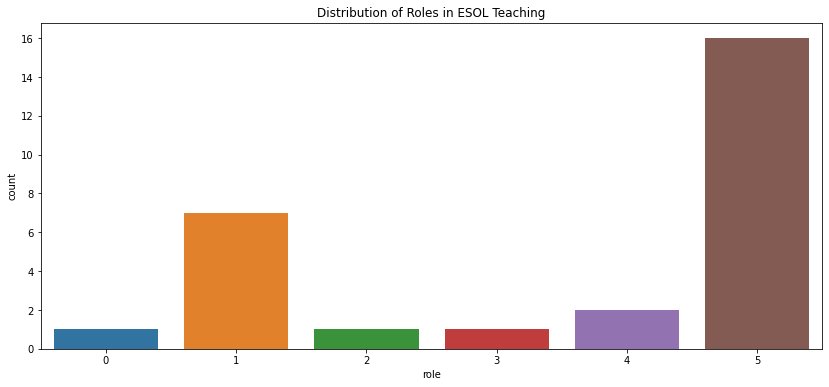

In [59]:
plt.figure(figsize=(14, 6))  
sns.countplot(x='role', data=data)
plt.title('Distribution of Roles in ESOL Teaching')
plt.show()

5). The histogram for teaching effectiveness

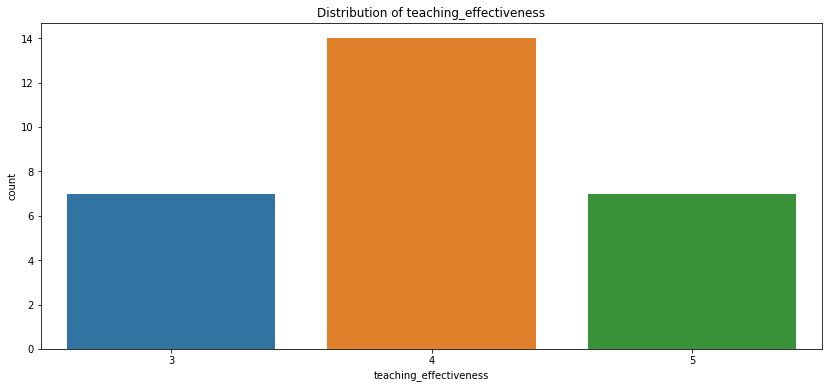

In [76]:
plt.figure(figsize=(14, 6))  
sns.countplot(x='teaching_effectiveness', data=data)
plt.title('Distribution of teaching_effectiveness')
plt.show()

### Analysis of Teaching Methods (RQ a):

Task-based Learning;                                                                                                                                      6
Collaborative Learning;                                                                                                                                   6
Direct Instruction;Collaborative Learning;Task-based Learning;Communicative Language Teaching (CLT);Technology Integration (e.g., apps, online tools);    3
Direct Instruction;                                                                                                                                       3
Technology Integration (e.g., apps, online tools);                                                                                                        2
Communicative Language Teaching (CLT);                                                                                                                    2
Communicative Language Teaching (CLT);Technology Integration (e.

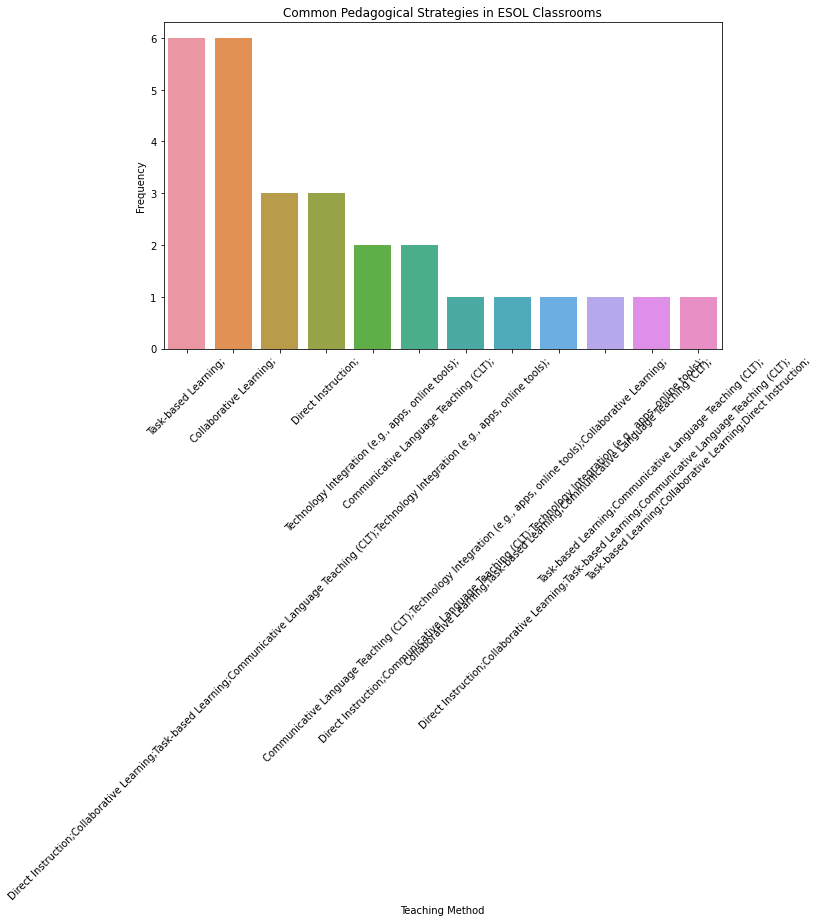

In [73]:
# Load data (make sure to use your actual file path)
esol_data = pd.read_csv('C:\\Users\\n\\Downloads\\ESOL_Teaching_Survey_Data.csv')  # Hypothetical dataset

# Step 1: Analyze Teaching Methods (Research Question a)
teaching_methods = esol_data['teaching_methods'].value_counts()
print(teaching_methods)

plt.figure(figsize=(10, 6))
sns.barplot(x=teaching_methods.index, y=teaching_methods.values)
plt.title('Common Pedagogical Strategies in ESOL Classrooms')
plt.ylabel('Frequency')
plt.xlabel('Teaching Method')
plt.xticks(rotation=45)
plt.show()


## Assessment of Teaching Effectiveness (RQ b)

Average Teaching Effectiveness by Teaching Method:
teaching_methods
Collaborative Learning;                                                                                                                                   4.166667
Collaborative Learning;Task-based Learning;Communicative Language Teaching (CLT);                                                                         4.000000
Communicative Language Teaching (CLT);                                                                                                                    5.000000
Communicative Language Teaching (CLT);Technology Integration (e.g., apps, online tools);Collaborative Learning;                                           3.000000
Direct Instruction;                                                                                                                                       3.666667
Direct Instruction;Collaborative Learning;Task-based Learning;Communicative Language Teaching (CLT);                 

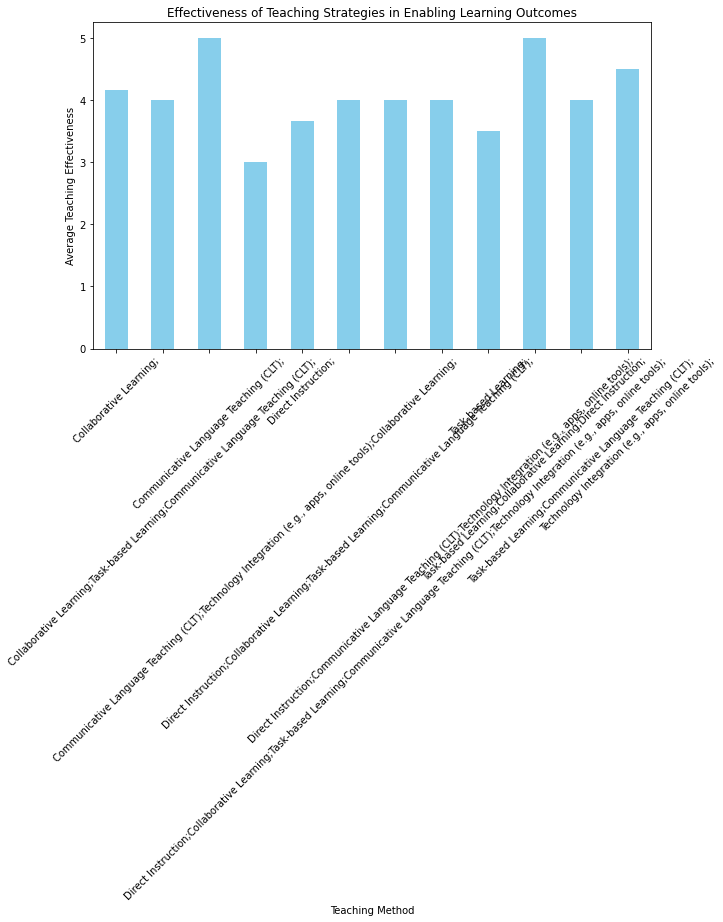

In [69]:
# Step 2: Assess Effectiveness of Teaching Methods (Research Question b)
# Group by teaching method and calculate average teaching effectiveness
outcomes_by_method = esol_data.groupby('teaching_methods')['teaching_effectiveness'].mean()

print("Average Teaching Effectiveness by Teaching Method:")
print(outcomes_by_method)

# Visualize outcomes by teaching method
plt.figure(figsize=(10, 6))
outcomes_by_method.plot(kind='bar', color='skyblue')
plt.title('Effectiveness of Teaching Strategies in Enabling Learning Outcomes')
plt.ylabel('Average Teaching Effectiveness')
plt.xlabel('Teaching Method')
plt.xticks(rotation=45)
plt.show()


## Statistical Testing (RQ c)

In [71]:
# Step 3: Statistical Test (e.g., T-test) to evaluate if differences in outcomes are significant
# Here you can compare two groups of teaching methods. This example compares two specific methods.
# You may need to modify this based on actual methods in your data.

# Example: Comparing "Direct Instruction" vs "Collaborative Learning"
direct_instruction = esol_data[esol_data['teaching_methods'].str.contains('Direct Instruction', na=False)]['teaching_effectiveness']
collaborative_learning = esol_data[esol_data['teaching_methods'].str.contains('Collaborative Learning', na=False)]['teaching_effectiveness']

# Perform t-test
t_stat, p_value = ttest_ind(direct_instruction, collaborative_learning, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between Direct Instruction and Collaborative Learning.")
else:
    print("There is no significant difference between Direct Instruction and Collaborative Learning.")



T-statistic: -0.2655803369236907, P-value: 0.793280745302779
There is no significant difference between Direct Instruction and Collaborative Learning.


## Correlation Analysis

                        teaching_effectiveness  tech_impact  \
teaching_effectiveness                1.000000     0.696733   
tech_impact                           0.696733     1.000000   
teacher_preparedness                  0.478091     0.582929   
curriculum_alignment                  0.454736     0.447522   

                        teacher_preparedness  curriculum_alignment  
teaching_effectiveness              0.478091              0.454736  
tech_impact                         0.582929              0.447522  
teacher_preparedness                1.000000              0.618247  
curriculum_alignment                0.618247              1.000000  


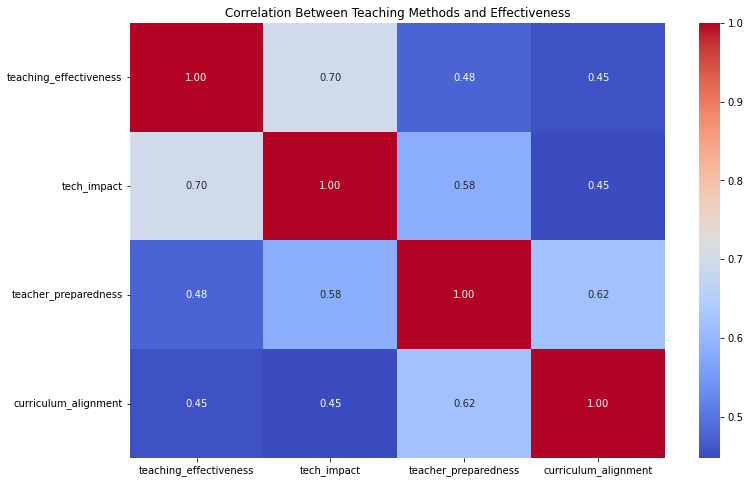

In [72]:
# Step 4: Correlation analysis to see relationship with effectiveness
correlation_matrix = esol_data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Teaching Methods and Effectiveness')
plt.show()

# THE END